In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
weekOneTracking = pd.read_csv("tracking_week_1.csv")

In [3]:
weekOneTracking

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104695,2022090800,3696,NaN,football,171,AFTER_SNAP,2022-09-09 03:07:37.7,NaN,football,left,1.70,0.62,14.42,5.36,1.47,NaN,NaN,pass_outcome_incomplete
7104696,2022090800,3696,NaN,football,172,AFTER_SNAP,2022-09-09 03:07:37.8,NaN,football,left,0.59,0.01,3.60,0.06,1.27,NaN,NaN,NaN
7104697,2022090800,3696,NaN,football,173,AFTER_SNAP,2022-09-09 03:07:37.9,NaN,football,left,0.23,-0.07,3.60,0.23,0.38,NaN,NaN,NaN
7104698,2022090800,3696,NaN,football,174,AFTER_SNAP,2022-09-09 03:07:38,NaN,football,left,-0.13,-0.17,3.63,0.06,0.37,NaN,NaN,NaN


In [4]:
players = pd.read_csv("players.csv")

In [5]:
weekOneTracking = pd.merge(
    weekOneTracking,
    players[['nflId','position']],
    how = "left",
    left_on=['nflId'],
    right_on=['nflId']
)

In [6]:
samplePlay = weekOneTracking[(weekOneTracking['gameId']==2022091101)&(weekOneTracking['playId']==1492)&(weekOneTracking['displayName']!="football")&(weekOneTracking['frameId']==161)]

In [7]:
samplePlayPoints = samplePlay[['nflId','x','y','club','position']]

In [8]:
new_rows = []

# Loop over each row in samplePlayPoints
for _, row in samplePlayPoints.iterrows():
    if row['position'] in ['WR', 'TE', 'RB']:
        # Create a new row with the adjusted x coordinate (x - 5)
        new_row = {
            'x': row['x'] - 5,
            'y': row['y'],
            'position': '',
            'club': None,
            'nflId': 0
        }
        new_rows.append(new_row)

new_rows_df = pd.DataFrame(new_rows)
filteredSamplePlayPoints = pd.concat([samplePlayPoints, new_rows_df], ignore_index=True)

In [9]:
filteredSamplePlayPoints

,nflId,x,y,club,position
0,41264.0,26.28,25.98,CLE,G
1,42347.0,44.74,44.17,CLE,WR
2,42368.0,39.20,34.55,CAR,ILB
3,43380.0,24.70,24.01,CLE,QB
4,44841.0,34.23,20.51,CLE,TE
5,44870.0,26.54,24.51,CLE,C
6,44898.0,32.14,33.99,CLE,RB
7,45004.0,55.13,24.67,CAR,FS
8,46124.0,43.57,24.30,CAR,CB
9,46205.0,27.18,26.29,CAR,OLB


In [10]:
samplePlayPoints

,nflId,x,y,club,position
5929744,41264.0,26.28,25.98,CLE,G
5929926,42347.0,44.74,44.17,CLE,WR
5930108,42368.0,39.20,34.55,CAR,ILB
5930290,43380.0,24.70,24.01,CLE,QB
5930472,44841.0,34.23,20.51,CLE,TE
5930654,44870.0,26.54,24.51,CLE,C
5930836,44898.0,32.14,33.99,CLE,RB
5931018,45004.0,55.13,24.67,CAR,FS
5931200,46124.0,43.57,24.30,CAR,CB
5931382,46205.0,27.18,26.29,CAR,OLB


In [11]:
from shapely.geometry import Polygon, Point
from shapely.ops import unary_union

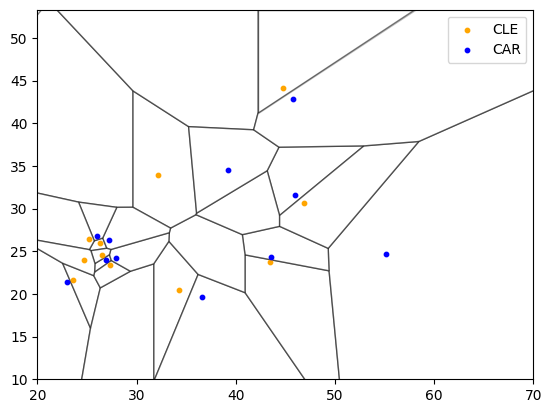

In [12]:
points = filteredSamplePlayPoints[['x', 'y']].values
x_min, x_max = 0, 100
y_min, y_max = 0, 53.3
boundary_points = np.array([
    [x_min, y_min],
    [x_min, y_max],
    [x_max, y_min],
    [x_max, y_max]
])
all_points = np.vstack([points, boundary_points])
vor = Voronoi(all_points)
boundary_polygon = Polygon([(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min)])

clipped_polygons = []
polygon_areas = []
for region in vor.regions:
    if not -1 in region and len(region) > 0:
        polygon = Polygon([vor.vertices[i] for i in region])
        clipped_polygon = polygon.intersection(boundary_polygon)
        if not clipped_polygon.is_empty:
            clipped_polygons.append(clipped_polygon)
            polygon_areas.append(clipped_polygon.area)

fig, ax = plt.subplots()


for poly in clipped_polygons:
    x, y = poly.exterior.xy
    ax.fill(x, y, alpha=0.5, edgecolor='black', facecolor='white')

club_colors = {'CLE': 'orange', 'CAR': 'blue'}
clubs = samplePlayPoints['club'].unique()
for club in clubs:
    club_points = samplePlayPoints[samplePlayPoints['club'] == club]
    club_color = club_colors.get(club, 'grey')
    ax.scatter(club_points['x'], club_points['y'], label=club, s=10, color=club_color)

plt.ylim(10, 53.3)
plt.xlim(20, 70)
plt.legend()
plt.show()

In [13]:
player_info = {tuple(row[['x', 'y']].values): {'nflId': row['nflId'], 'position': row['position']} 
               for idx, row in filteredSamplePlayPoints.iterrows()}

for poly, area in zip(clipped_polygons, polygon_areas):
    for point_coords, info in player_info.items():
        point = Point(point_coords)
        if poly.contains(point) and info['position'] in ['TE','RB','WR']:
            print(f"Polygon area: {area:.2f}, nflId: {info['nflId']}, position: {info['position']}")

Polygon area: 96.04, nflId: 42347.0, position: WR
Polygon area: 37.64, nflId: 44841.0, position: TE
Polygon area: 103.56, nflId: 52595.0, position: WR
Polygon area: 77.13, nflId: 44898.0, position: RB
Polygon area: 71.87, nflId: 54564.0, position: WR


In [84]:
plays = pd.read_csv("plays.csv")

In [202]:
def max_voronoi_per_play(sampleLoop):
    sampleLoop = sampleLoop[(sampleLoop['displayName']!="football")]
    sampleLoop = pd.merge(
        sampleLoop,
        plays[['gameId','playId','timeToThrow','pff_manZone']],
        how = "left",
        left_on = ['gameId','playId'],
        right_on=['gameId','playId']
    )
    sampleLoop[sampleLoop['pff_manZone']=="Man"]
    snap_frames = sampleLoop[sampleLoop['frameType'] == 'SNAP'][['gameId', 'playId', 'frameId']]
    sampleLoop = pd.merge(sampleLoop, snap_frames, on=['gameId', 'playId'], how='left', suffixes=('', '_snapframe'))
    sampleLoop['snapframe'] = sampleLoop['frameId_snapframe']
    sampleLoop = sampleLoop.drop(columns=['frameId_snapframe'])
    after_snap_data = sampleLoop[(sampleLoop['frameType'] == "AFTER_SNAP")]
    results = []
    for name, group in after_snap_data.groupby(['gameId', 'playId', 'frameId']):
        frame = group[['nflId','club','x','y','position','gameId','playId','frameId','timeToThrow','snapframe']]
        frame['timeSinceSnap'] = (frame['frameId'] - frame['snapframe'])/10
        frame = frame[(frame['timeSinceSnap']>=1)&(frame['timeSinceSnap']<=frame['timeToThrow'])]
        new_rows = []
        for _, row in frame.iterrows():
            if row['position'] in ['WR', 'TE', 'RB']:
                new_row = {
                    'x': row['x'] - 5,
                    'y': row['y'],
                    'position': '',
                    'club': None,
                    'nflId': 0,
                    'gameId': row['gameId'],
                    'playId': row['playId'],
                    'frameId': row['frameId']
                }
                new_rows.append(new_row)
        new_rows_df = pd.DataFrame(new_rows)
        newFrames = pd.concat([frame, new_rows_df], ignore_index=True)
        points = newFrames[['x', 'y']].values
        x_min, x_max = 0, 100
        y_min, y_max = 0, 53.3
        boundary_points = np.array([
            [x_min, y_min],
            [x_min, y_max],
            [x_max, y_min],
            [x_max, y_max]
        ])
        all_points = np.vstack([points, boundary_points])
        vor = Voronoi(all_points)
        boundary_polygon = Polygon([(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min)])
        
        clipped_polygons = []
        polygon_areas = []
        for region in vor.regions:
            if not -1 in region and len(region) > 0:
                polygon = Polygon([vor.vertices[i] for i in region])
                clipped_polygon = polygon.intersection(boundary_polygon)
                if not clipped_polygon.is_empty:
                    clipped_polygons.append(clipped_polygon)
                    polygon_areas.append(clipped_polygon.area)

        player_info = {tuple(row[['x', 'y']].values): {'nflId': row['nflId'], 'position': row['position'], 'TTT': row['timeToThrow'], 'timeSinceSnap': row['timeSinceSnap']} 
                    for idx, row in newFrames.iterrows()}
        for poly, area in zip(clipped_polygons, polygon_areas):
            for point_coords, info in player_info.items():
                point = Point(point_coords)
                if poly.contains(point) and info['position'] in ['TE','RB','WR']:
                    results.append({
                        'gameId': name[0],
                        'playId': name[1],
                        'frameId': name[2],
                        'nflId': info['nflId'],
                        'position': info['position'],
                        'voronoiArea': area,
                        'timeToThrow': info['TTT'],
                        'timeSinceSnap': info['timeSinceSnap']
                    })
    results = pd.DataFrame(results)

    max_separation_per_play = results.groupby(['gameId', 'playId', 'nflId'])['voronoiArea'].max().reset_index()
    max_separation_per_play.columns = ['gameId', 'playId', 'routeRunnerId', 'maxVoronoi']

    result = pd.merge(
        max_separation_per_play,
        results[['gameId', 'playId', 'nflId', 'frameId', 'voronoiArea', 'timeSinceSnap', 'timeToThrow']],  # Select necessary columns
        how='left',
        left_on=['gameId', 'playId', 'routeRunnerId', 'maxVoronoi'],  # Join on the maximum separation
        right_on=['gameId', 'playId', 'nflId', 'voronoiArea']  # Join on the separation value
    )
    return result

In [207]:
sample = weekOneTracking[(weekOneTracking['gameId']==2022091101)]

In [208]:
max_voronoi_per_play(sample)

C:\Users\bhaga\AppData\Local\Temp\ipykernel_26912\1535602538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['timeSinceSnap'] = (frame['frameId'] - frame['snapframe'])/10
C:\Users\bhaga\AppData\Local\Temp\ipykernel_26912\1535602538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['timeSinceSnap'] = (frame['frameId'] - frame['snapframe'])/10
C:\Users\bhaga\AppData\Local\Temp\ipykernel_26912\1535602538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,gameId,playId,routeRunnerId,maxVoronoi,nflId,frameId,voronoiArea,timeSinceSnap,timeToThrow
0,2022091101,63,43808.0,90.356775,43808.0,140,90.356775,1.0,1.669
1,2022091101,63,44820.0,27.389303,44820.0,140,27.389303,1.0,1.669
2,2022091101,63,46093.0,37.165944,46093.0,140,37.165944,1.0,1.669
3,2022091101,63,46170.0,8.109956,46170.0,146,8.109956,1.6,1.669
4,2022091101,63,53633.0,11.805443,53633.0,146,11.805443,1.6,1.669
...,...,...,...,...,...,...,...,...,...
234,2022091101,4242,43808.0,52.248232,43808.0,130,52.248232,1.0,2.135
235,2022091101,4242,44820.0,88.731773,44820.0,137,88.731773,1.7,2.135
236,2022091101,4242,46093.0,61.981583,46093.0,132,61.981583,1.2,2.135
237,2022091101,4242,46170.0,49.940147,46170.0,141,49.940147,2.1,2.135
